# Demo No. 5 - Pulsations 

This package models stellar pulations as a perturbations of stellar surface in form of spherical harmonics. The package models deformation of the surface geometry and perturbations in surface effective temperature distribution as well. This demo will demonstrate how to model pulsation modes on the surface of star.

## Generating the pulsation metadata

Pulsations modes itself are difined similarly as spots in previous demo:   

In [7]:
from astropy import units as u

pulsations_meta = [
        {
            'l': 5,
            'm': 5,
            'amplitude': 3000 * u.m/u.s,
            'frequency': 15 / u.d,
            'start_phase': 0.2,
            'mode_axis_theta': 15 * u.deg,
            'mode_axis_phi': 90 * u.deg,
        },
#         {
#             'l': 5,
#             'm': -5,
#             'amplitude': 100 * u.K,
#             'frequency': 15 / u.d,
#             'start_phase': 0.2,
#             'mode_axis_theta': 30*u.deg,
#             'mode_axis_phi': 0*u.deg,
#         },
    ]

Each pulsation mode is defined by the angular degree `l`, azimuthal order `m`, radial amplitude of the effective temperature perturbation `amplitude`, mode frequency `frequency`and `start_phase` of the given mode at photometric phase 0.
In case of the missalligned mode, where the mode axis is not parallel with axis of rotation, mode axis can be defined by the angular spherical coordinates of the mode axis at photometric phase 0 using parameters `mode_axis_theta` and `mode_axis_phi`.

## Generating a binary system

Pulsation mode data are also passed to the binary system component in the form of the keyword argument `pulsations`:

In [8]:
from elisa.binary_system.system import BinarySystem
from elisa.base.star import Star

primary = Star(
    mass=2.15 * u.solMass,
    surface_potential=5.0,
    synchronicity=1.0,
    t_eff=10000 * u.K,
    gravity_darkening=1.0,
    discretization_factor=3, 
    albedo=0.6,
    metallicity=0.0,
    pulsations = pulsations_meta  # here we declared the pulsation modes on the primary component
)

secondary = Star(
    mass=1.2 * u.solMass,
    surface_potential=7.0,
    synchronicity=1.0,
    t_eff=7000 * u.K,
    gravity_darkening=1.0,
    # discretization_factor=20,
    albedo=0.6,
    metallicity=0,  # similarly, pulsation modes can be added to the secondary component as well
)

bs = BinarySystem(
    primary=primary,
    secondary=secondary,
    argument_of_periastron=58 * u.deg,
    gamma=-30.7 * u.km / u.s,
    period=10 * u.d,
    eccentricity=0.2,
    inclination=85 * u.deg,
    primary_minimum_time=2440000.0 * u.d,
    phase_shift=0.0,
)

2020-01-17 16:25:56,589 - 12082 - pulse.mode - INFO: initialising object PulsationMode
2020-01-17 16:25:56,595 - 12082 - binary_system.system - INFO: initialising object BinarySystem
2020-01-17 16:25:56,613 - 12082 - binary_system.system - INFO: setting discretization factor of secondary component to 6.88 as a according to discretization factor of the primary component andconfiguration boundaries


## Accessing the basic properties of a PulsationMode

Each of the pulsational modes defined in `pulsations_meta` are now stored along with its index in a dictionary as a separate objects within our pulsating component which can be accessed here: 

In [12]:
bs.primary.pulsations

{0: <elisa.pulse.mode.PulsationMode at 0x7f3efb540198>}

Each parameter of given pulsation mode is stored as an atribute of `PulsationMode` object:

In [37]:
from elisa import units as eu


pm = bs.primary.pulsations[0]

print(f'Parameters of the pulsation mode: l = {pm.l}, m = {pm.m}, amplitude = {pm.amplitude} {eu.VELOCITY_UNIT}, \n \
      frequency = {pm.frequency:.3} {eu.FREQUENCY_UNIT}, axis_theta = {pm.mode_axis_theta:.3}, axis_phi={pm.mode_axis_phi:.3}.')

Parameters of the pulsation mode: l = 5, m = 5, amplitude = 3000.0 m / s, 
       frequency = 0.000174 Hz, axis_theta = 0.262, axis_phi=1.57.


With this keyword argument, all the temperature containers (star and spot containers) will contain effective temperatures perturbed by pulsations. 

## Visualizing the output

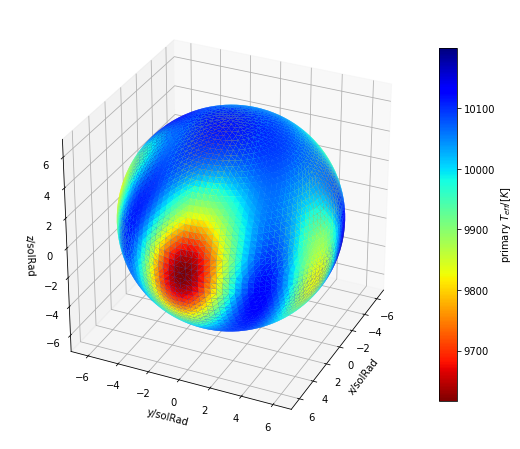

In [10]:
bs.plot.surface(phase=0.05,
                components_to_plot='primary',
                colormap='temperature',
                axis_unit=u.solRad,
                inclination=60
               )